In [ ]:
!pip install yfinance pandas numpy scikit-learn matplotlib seaborn


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
nifty_50_stocks = [
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "HDFCBANK.NS", "ICICIBANK.NS", "HINDUNILVR.NS",
    "KOTAKBANK.NS", "SBIN.NS", "BHARTIARTL.NS", "BAJFINANCE.NS", "HDFC.NS", "ITC.NS",
    "ASIANPAINT.NS", "ADANIGREEN.NS", "WIPRO.NS", "ULTRACEMCO.NS", "SUNPHARMA.NS",
    "DIVISLAB.NS", "HCLTECH.NS", "DRREDDY.NS", "M&M.NS", "TITAN.NS", "POWERGRID.NS",
    "JSWSTEEL.NS", "TECHM.NS", "NTPC.NS", "CIPLA.NS", "SHREECEM.NS", "ADANIPORTS.NS",
    "HINDALCO.NS", "BRITANNIA.NS", "TATASTEEL.NS", "INDUSINDBK.NS", "NESTLEIND.NS",
    "LARSEN.NS", "COTTON_NSW.NS", "EICHERMOT.NS", "AMBUJACEM.NS", "APOLLOHOSP.NS",
    "PIDILITIND.NS", "ACC.NS", "SBI.LIFE.NS", "SBICARD.NS", "DLF.NS", "RECLTD.NS"
]


In [ ]:

def fetch_stock_data(ticker, period='6mo', interval='1d'):
    stock_data = yf.download(ticker, period=period, interval=interval)
    stock_data.reset_index(inplace=True)
    return stock_data


nifty_50_data = {}


for ticker in nifty_50_stocks:
    try:
        nifty_50_data[ticker] = fetch_stock_data(ticker)
        print(f"Successfully fetched data for {ticker}")
    except Exception as e:
        print(f"Failed to fetch data for {ticker}: {e}")


all_stocks_data = pd.concat(nifty_50_data.values(), keys=nifty_50_data.keys())
all_stocks_data.reset_index(level=0, inplace=True)
all_stocks_data.rename(columns={'level_0': 'Ticker'}, inplace=True)


if all_stocks_data.empty:
    raise ValueError("No stock data available. Please check the tickers.")


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for RELIANCE.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully fetched data for TCS.NS
Successfully fetched data for INFY.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully fetched data for HDFCBANK.NS
Successfully fetched data for ICICIBANK.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully fetched data for HINDUNILVR.NS
Successfully fetched data for KOTAKBANK.NS


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Successfully fetched data for SBIN.NS
Successfully fetched data for BHARTIARTL.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for BAJFINANCE.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['HDFC.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')


Successfully fetched data for HDFC.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ITC.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ASIANPAINT.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ADANIGREEN.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for WIPRO.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ULTRACEMCO.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for SUNPHARMA.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for DIVISLAB.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for HCLTECH.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for DRREDDY.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for M&M.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for TITAN.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for POWERGRID.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for JSWSTEEL.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for TECHM.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for NTPC.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for CIPLA.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for SHREECEM.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ADANIPORTS.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for HINDALCO.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for BRITANNIA.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for TATASTEEL.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for INDUSINDBK.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for NESTLEIND.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['LARSEN.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')


Successfully fetched data for LARSEN.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['COTTON_NSW.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')


Successfully fetched data for COTTON_NSW.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for EICHERMOT.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for AMBUJACEM.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for APOLLOHOSP.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for PIDILITIND.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for ACC.NS


[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['SBI.LIFE.NS']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (period=6mo) (Yahoo error = "No data found, symbol may be delisted")')
[*********************100%***********************]  1 of 1 completed


Successfully fetched data for SBI.LIFE.NS
Successfully fetched data for SBICARD.NS


[*********************100%***********************]  1 of 1 completed


Successfully fetched data for DLF.NS


[*********************100%***********************]  1 of 1 completed

Successfully fetched data for RECLTD.NS



<ipython-input-5-0289d8845b17>:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_data = pd.concat(nifty_50_data.values(), keys=nifty_50_data.keys())


In [ ]:
def add_technical_indicators(df):

    df['SMA_5'] = df['Close'].rolling(window=5).mean()
    df['SMA_10'] = df['Close'].rolling(window=10).mean()


    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df['Price_Change'] = df['Close'].pct_change() * 100
    df['Target'] = np.where(df['Price_Change'].shift(-1) > 0, 1, 0)

    return df


In [ ]:
all_stocks_data = add_technical_indicators(all_stocks_data)
all_stocks_data.dropna(inplace=True)


         Ticker       Date         Open         High          Low  \
13  RELIANCE.NS 2024-05-08  2795.000000  2865.899902  2795.000000   
14  RELIANCE.NS 2024-05-09  2826.000000  2847.500000  2780.000000   
15  RELIANCE.NS 2024-05-10  2793.500000  2820.000000  2776.149902   
16  RELIANCE.NS 2024-05-13  2799.800049  2813.949951  2768.000000   
17  RELIANCE.NS 2024-05-14  2801.949951  2854.149902  2800.050049   
18  RELIANCE.NS 2024-05-15  2841.000000  2859.949951  2826.050049   
19  RELIANCE.NS 2024-05-16  2837.100098  2855.000000  2796.050049   
20  RELIANCE.NS 2024-05-17  2846.100098  2874.399902  2826.500000   
21  RELIANCE.NS 2024-05-21  2851.199951  2883.649902  2851.199951   
22  RELIANCE.NS 2024-05-22  2872.550049  2937.550049  2872.550049   
23  RELIANCE.NS 2024-05-23  2917.100098  2984.449951  2910.000000   
24  RELIANCE.NS 2024-05-24  2967.250000  2977.000000  2952.199951   
25  RELIANCE.NS 2024-05-27  2960.449951  2969.800049  2923.100098   
26  RELIANCE.NS 2024-05-28  2936.0

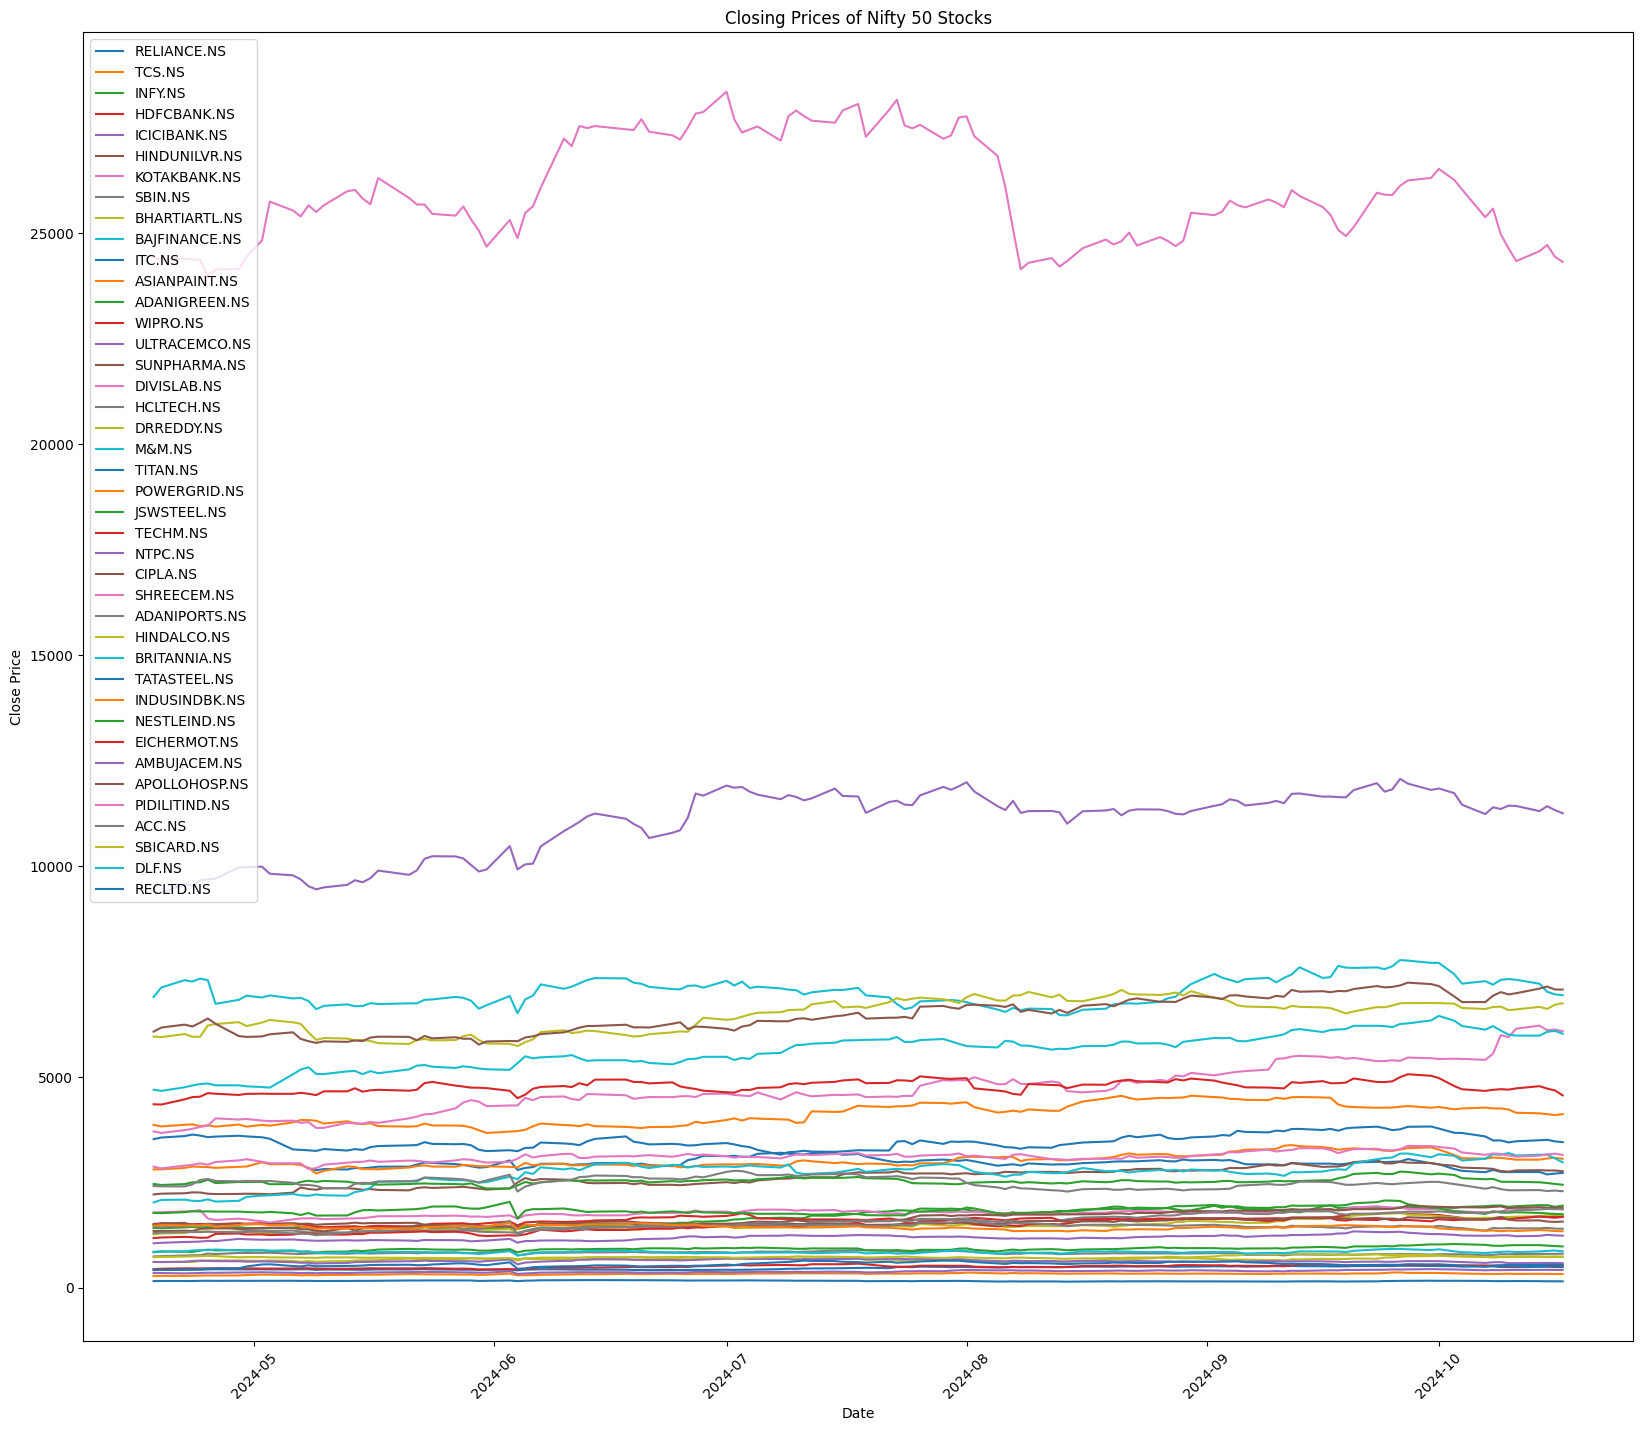

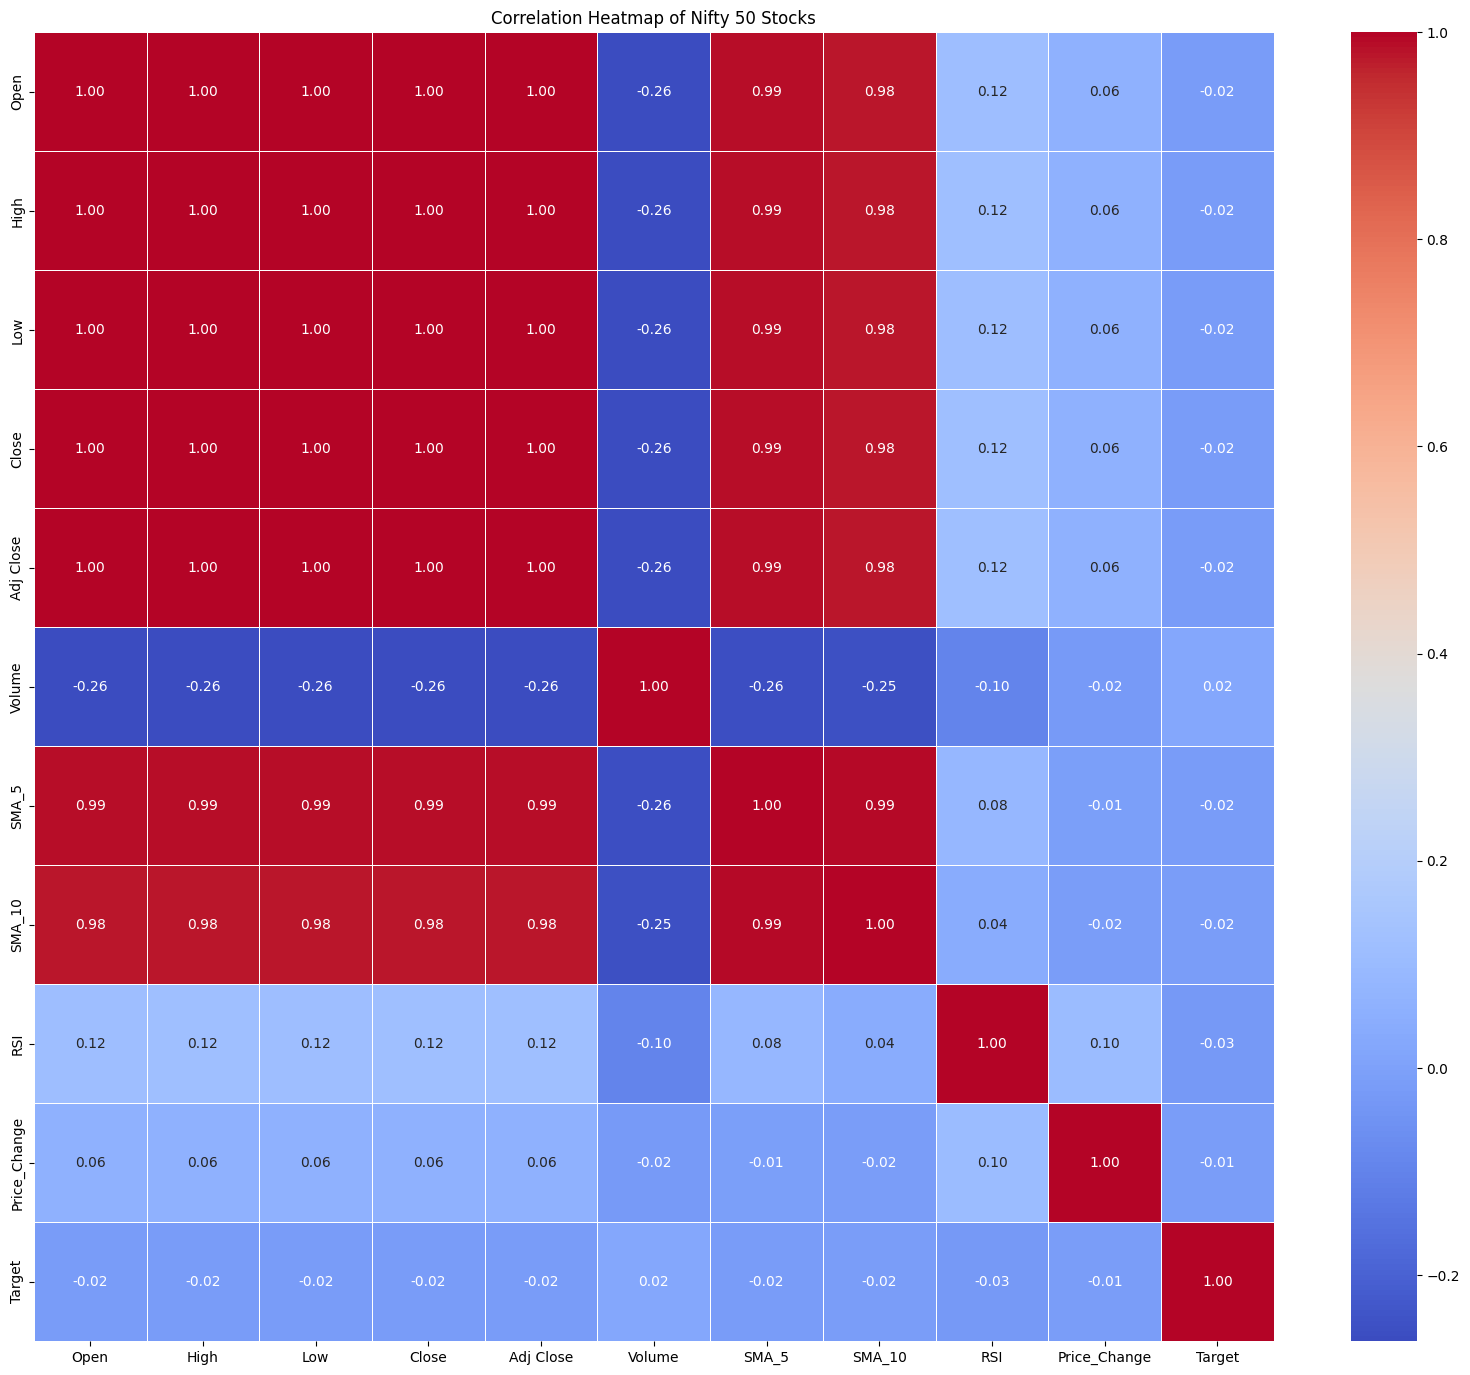

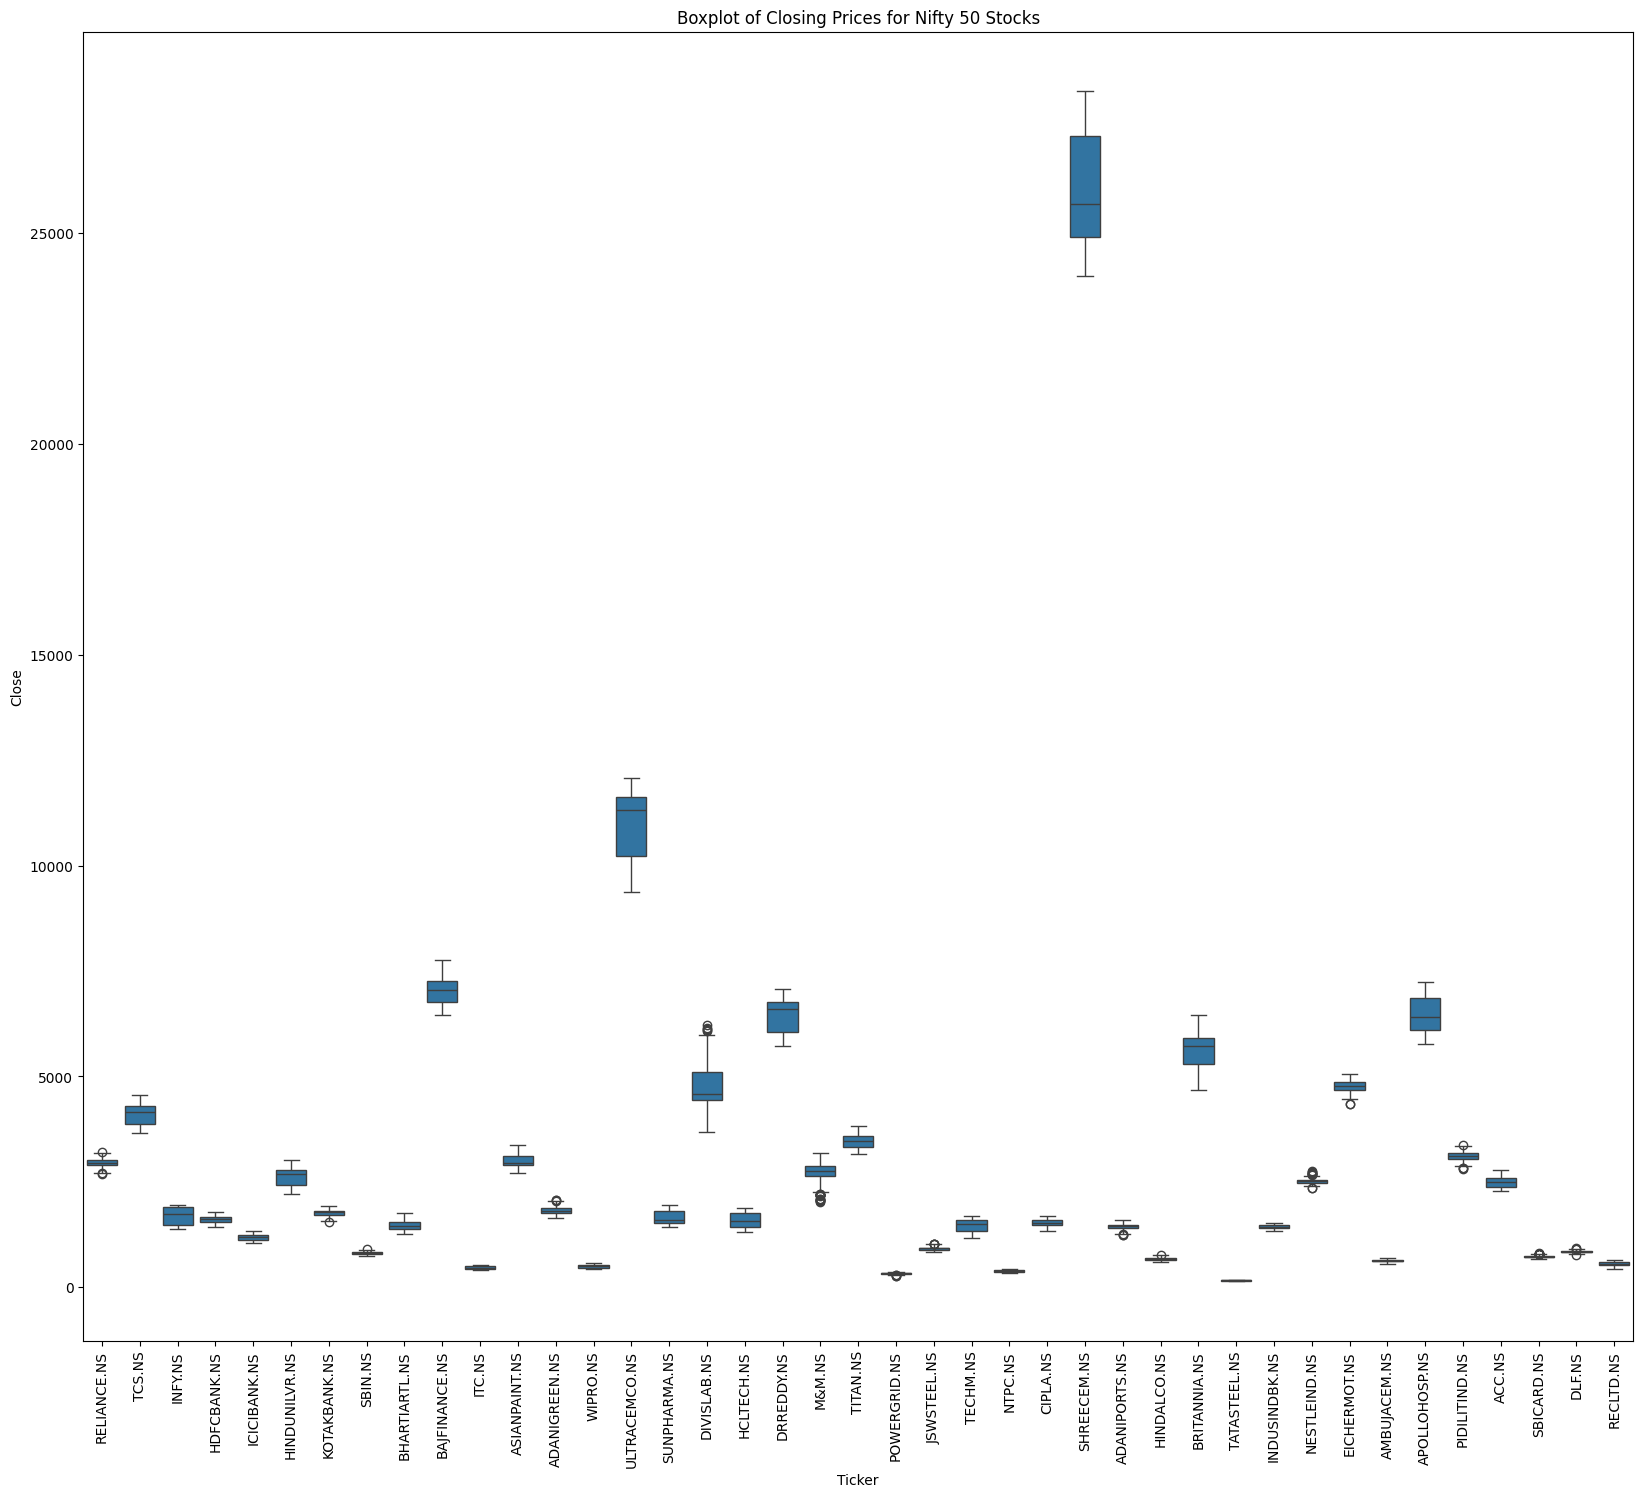

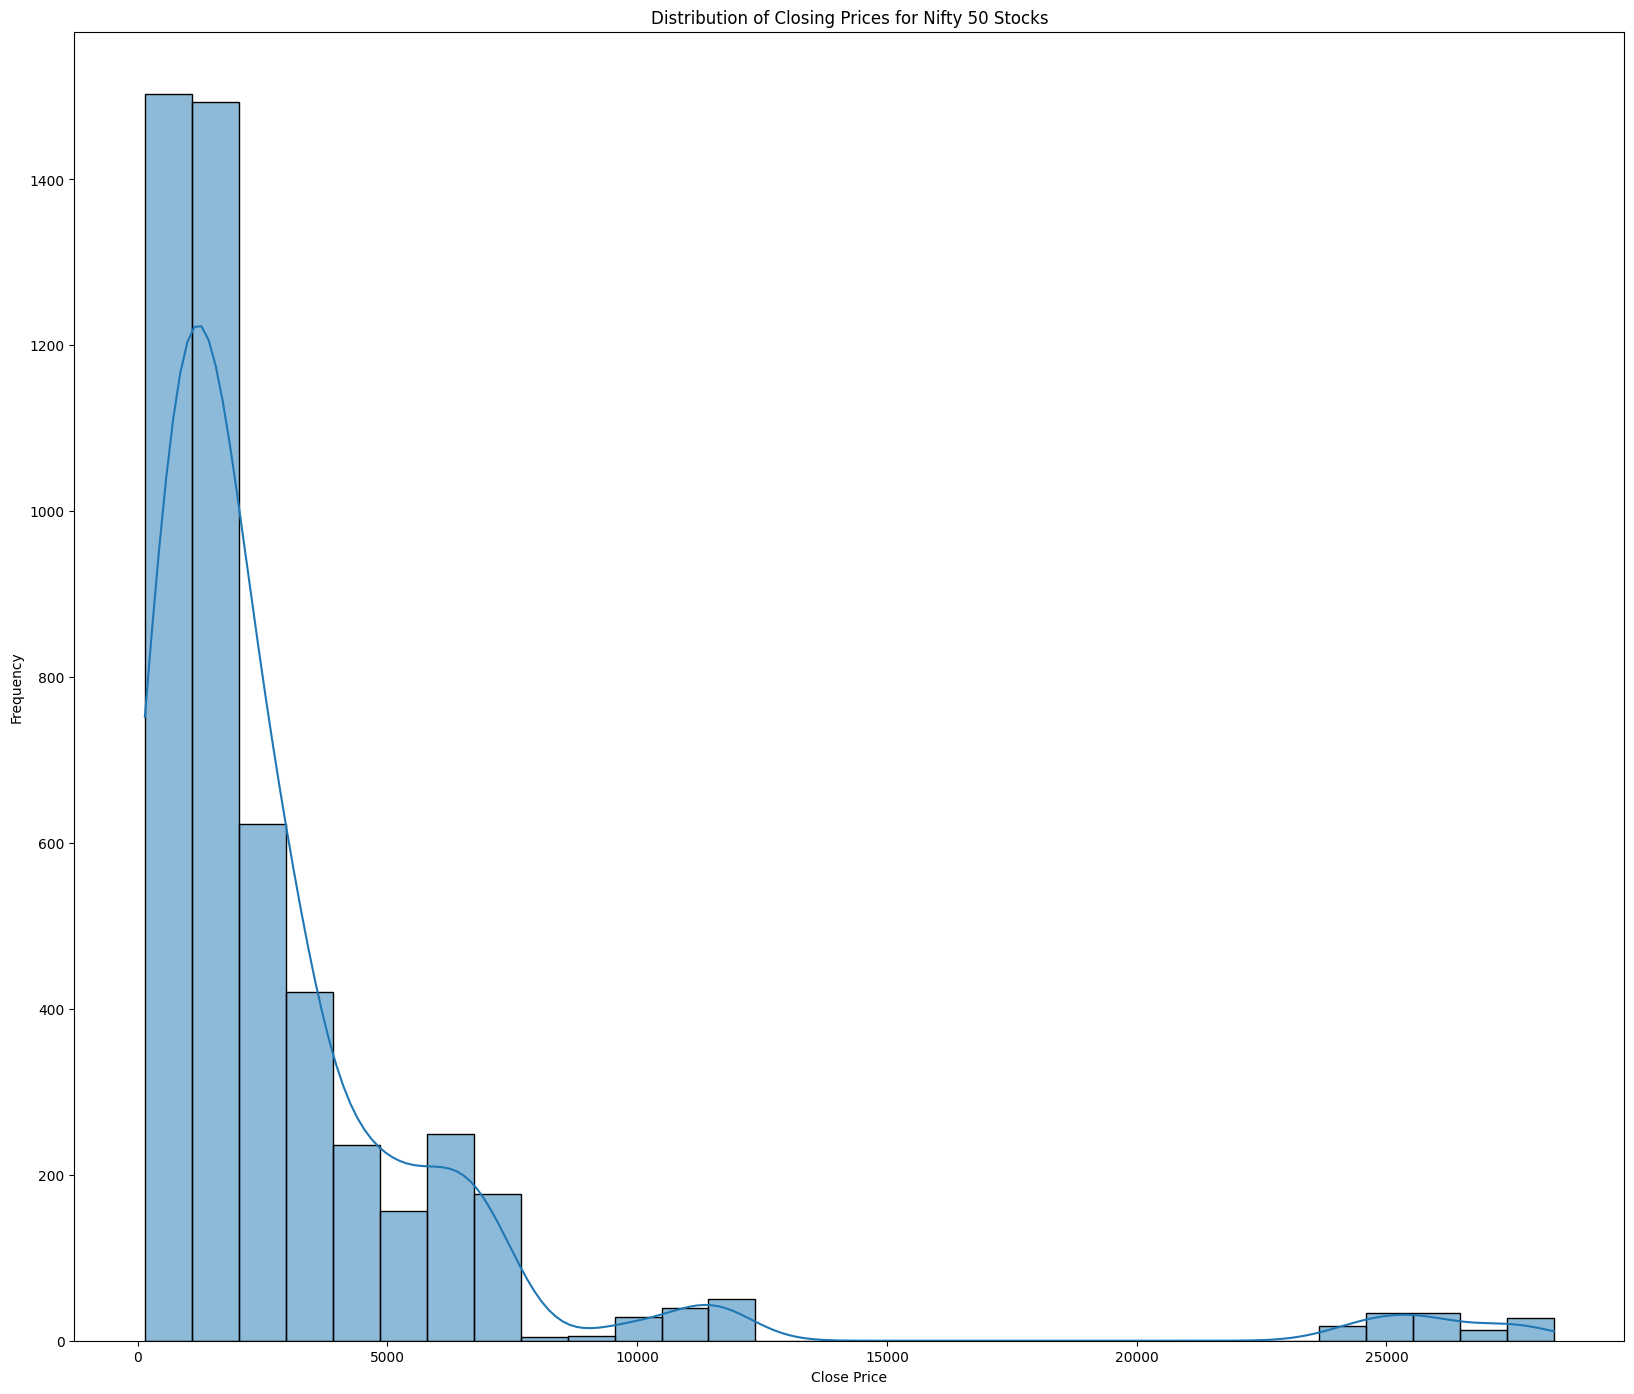

<ipython-input-8-769c8e86ad51>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Price_Change'] = stock_data['Close'].pct_change() * 100


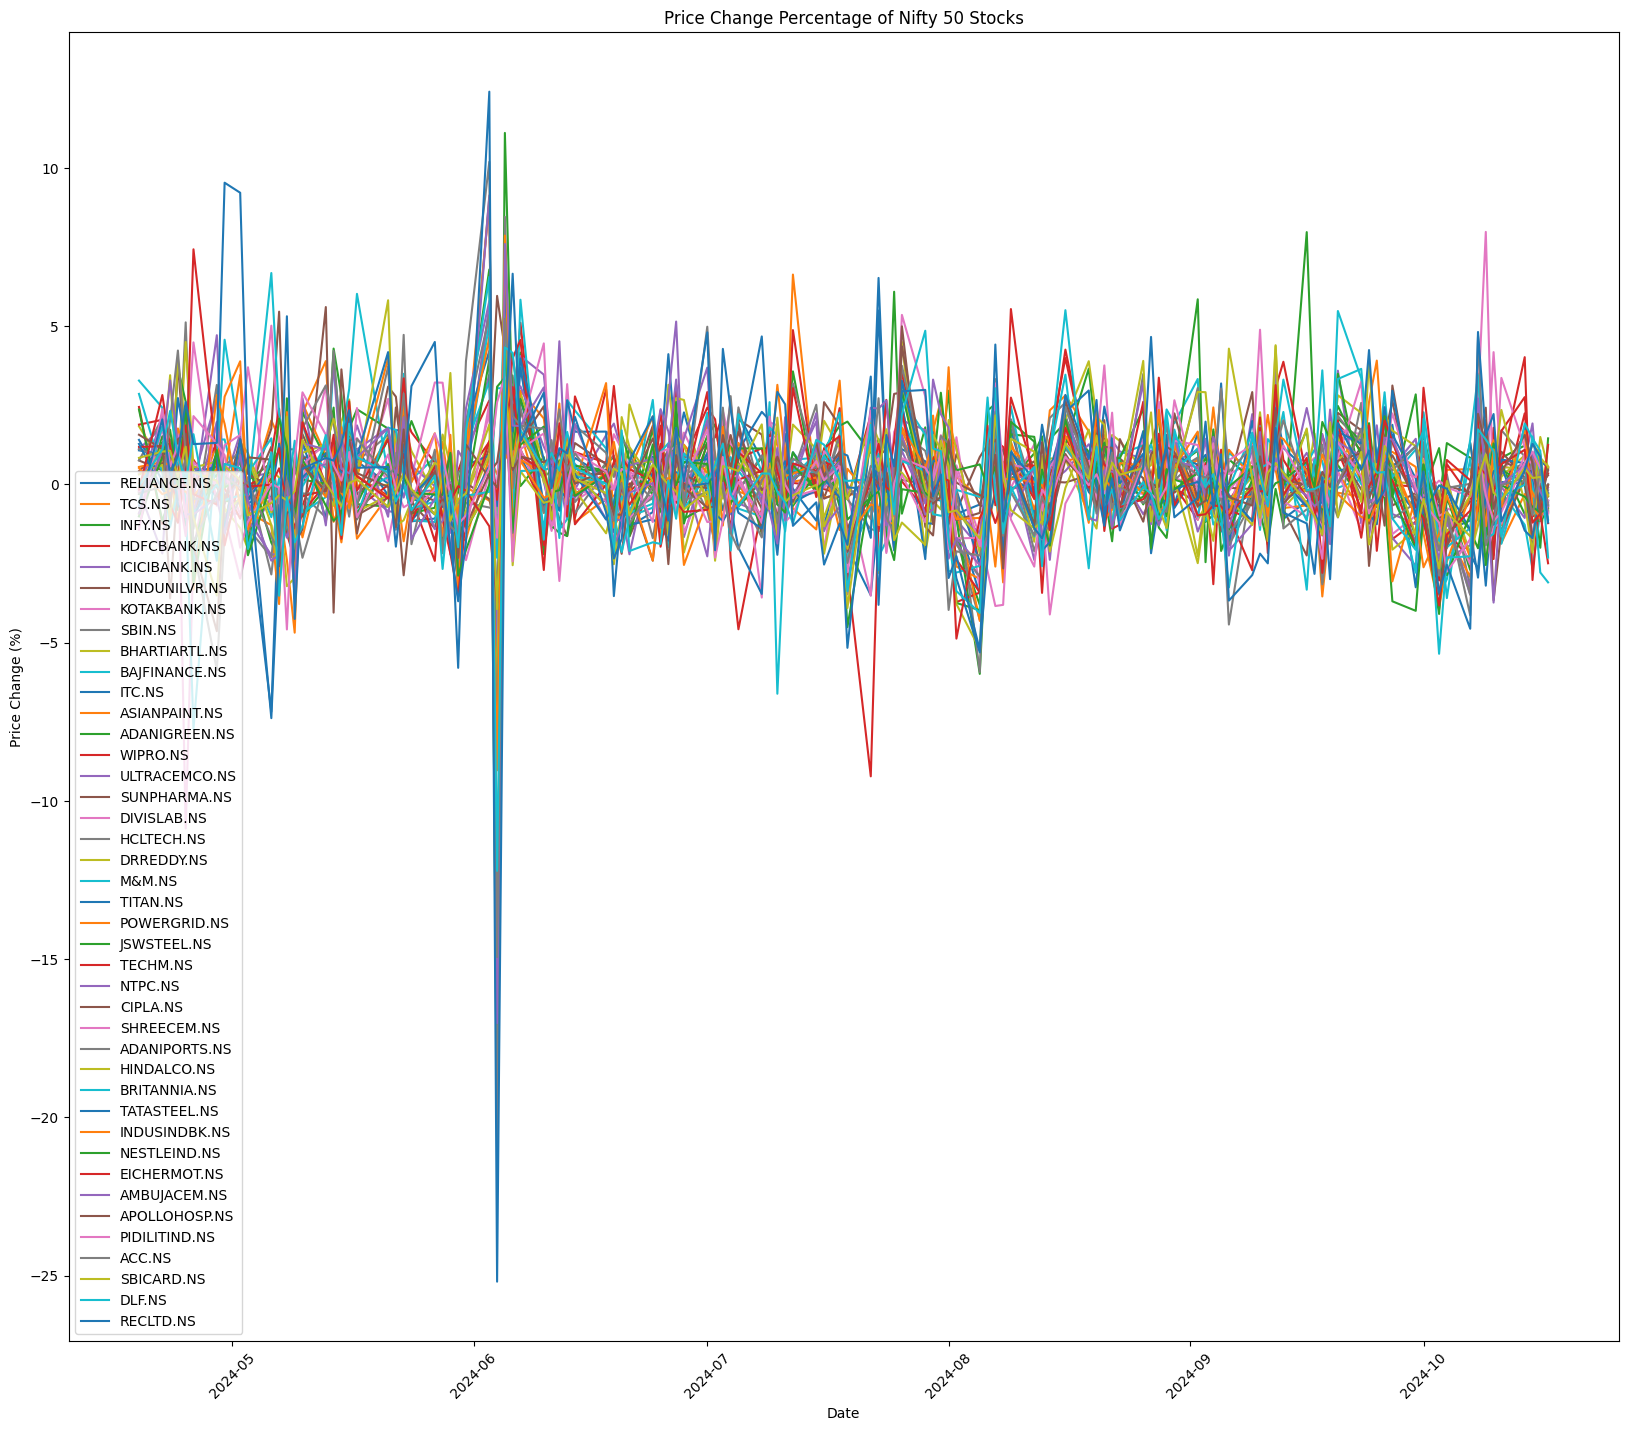

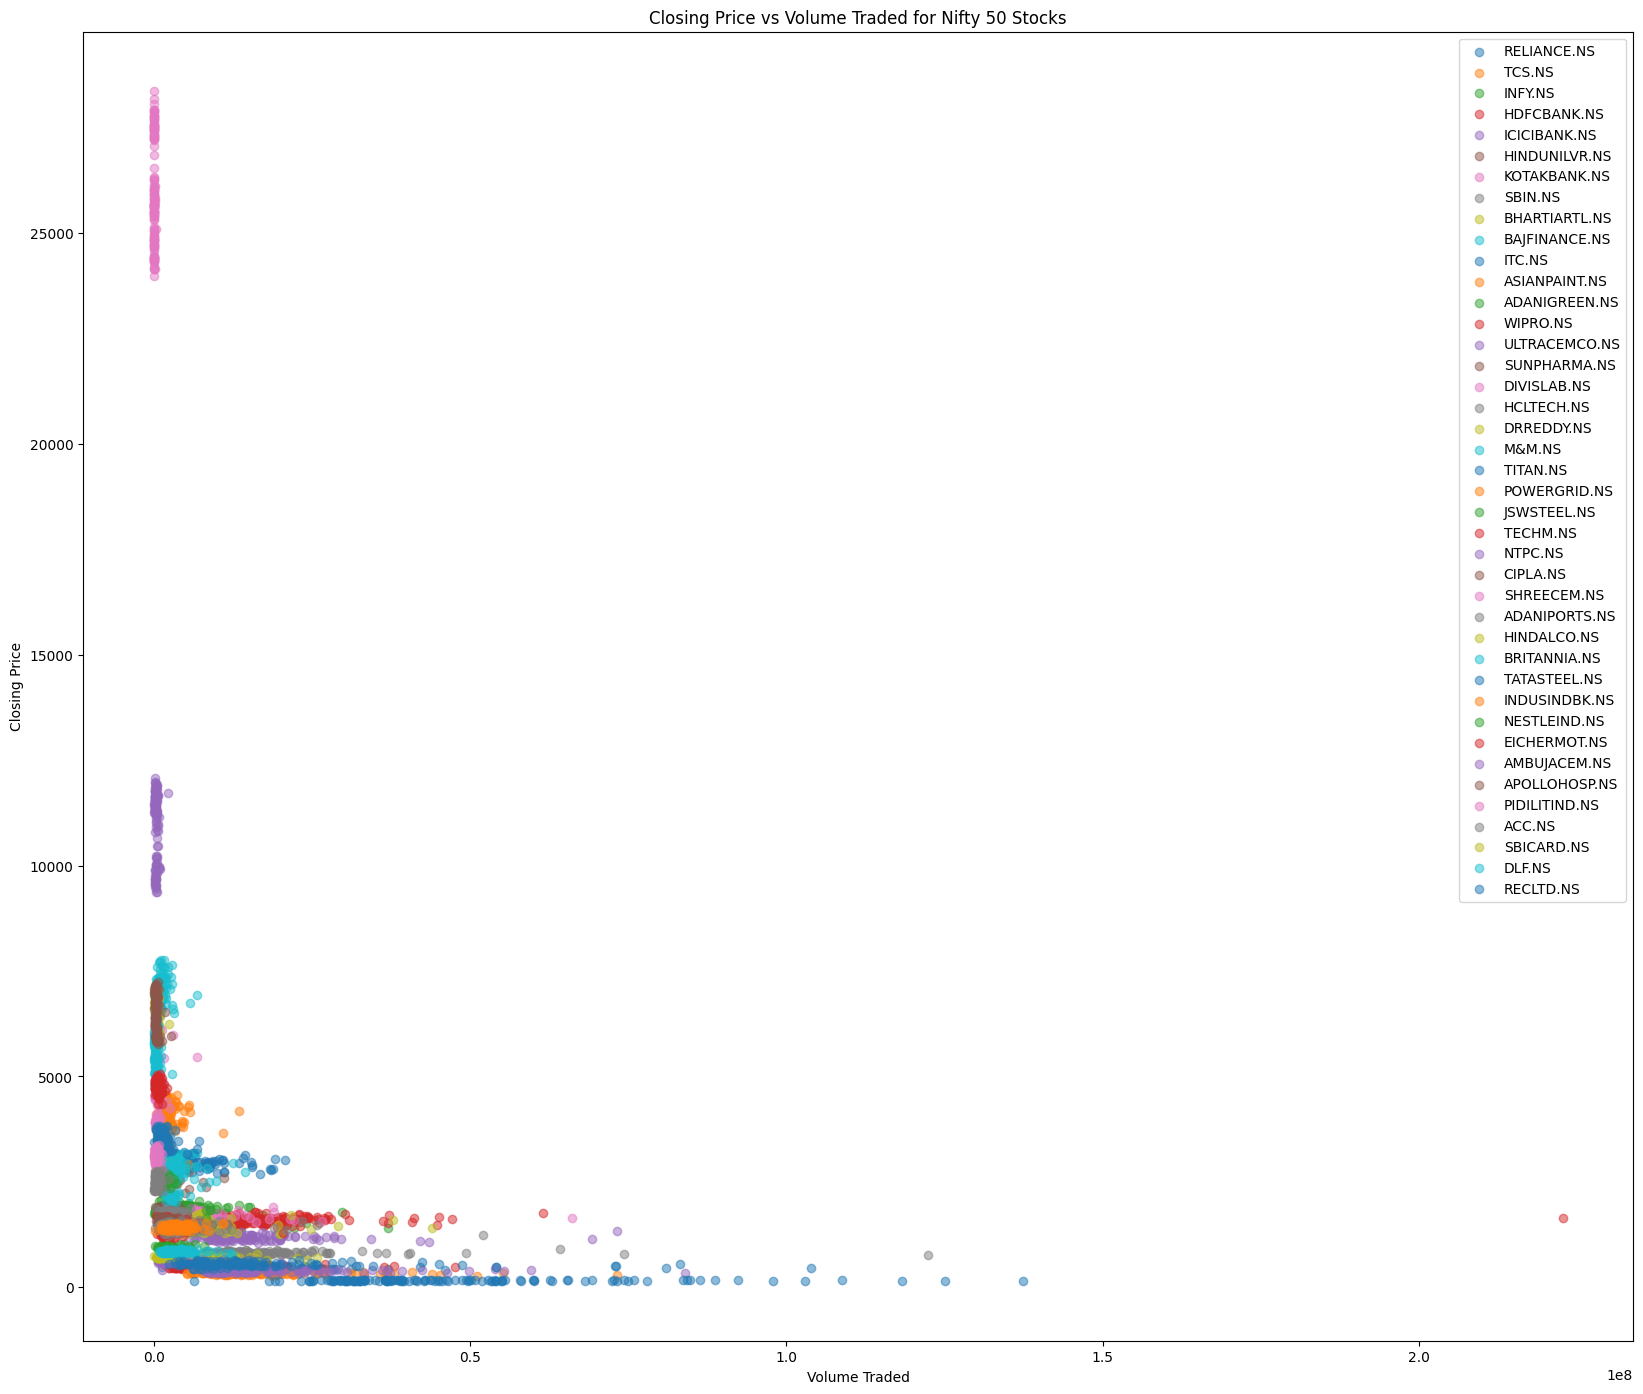

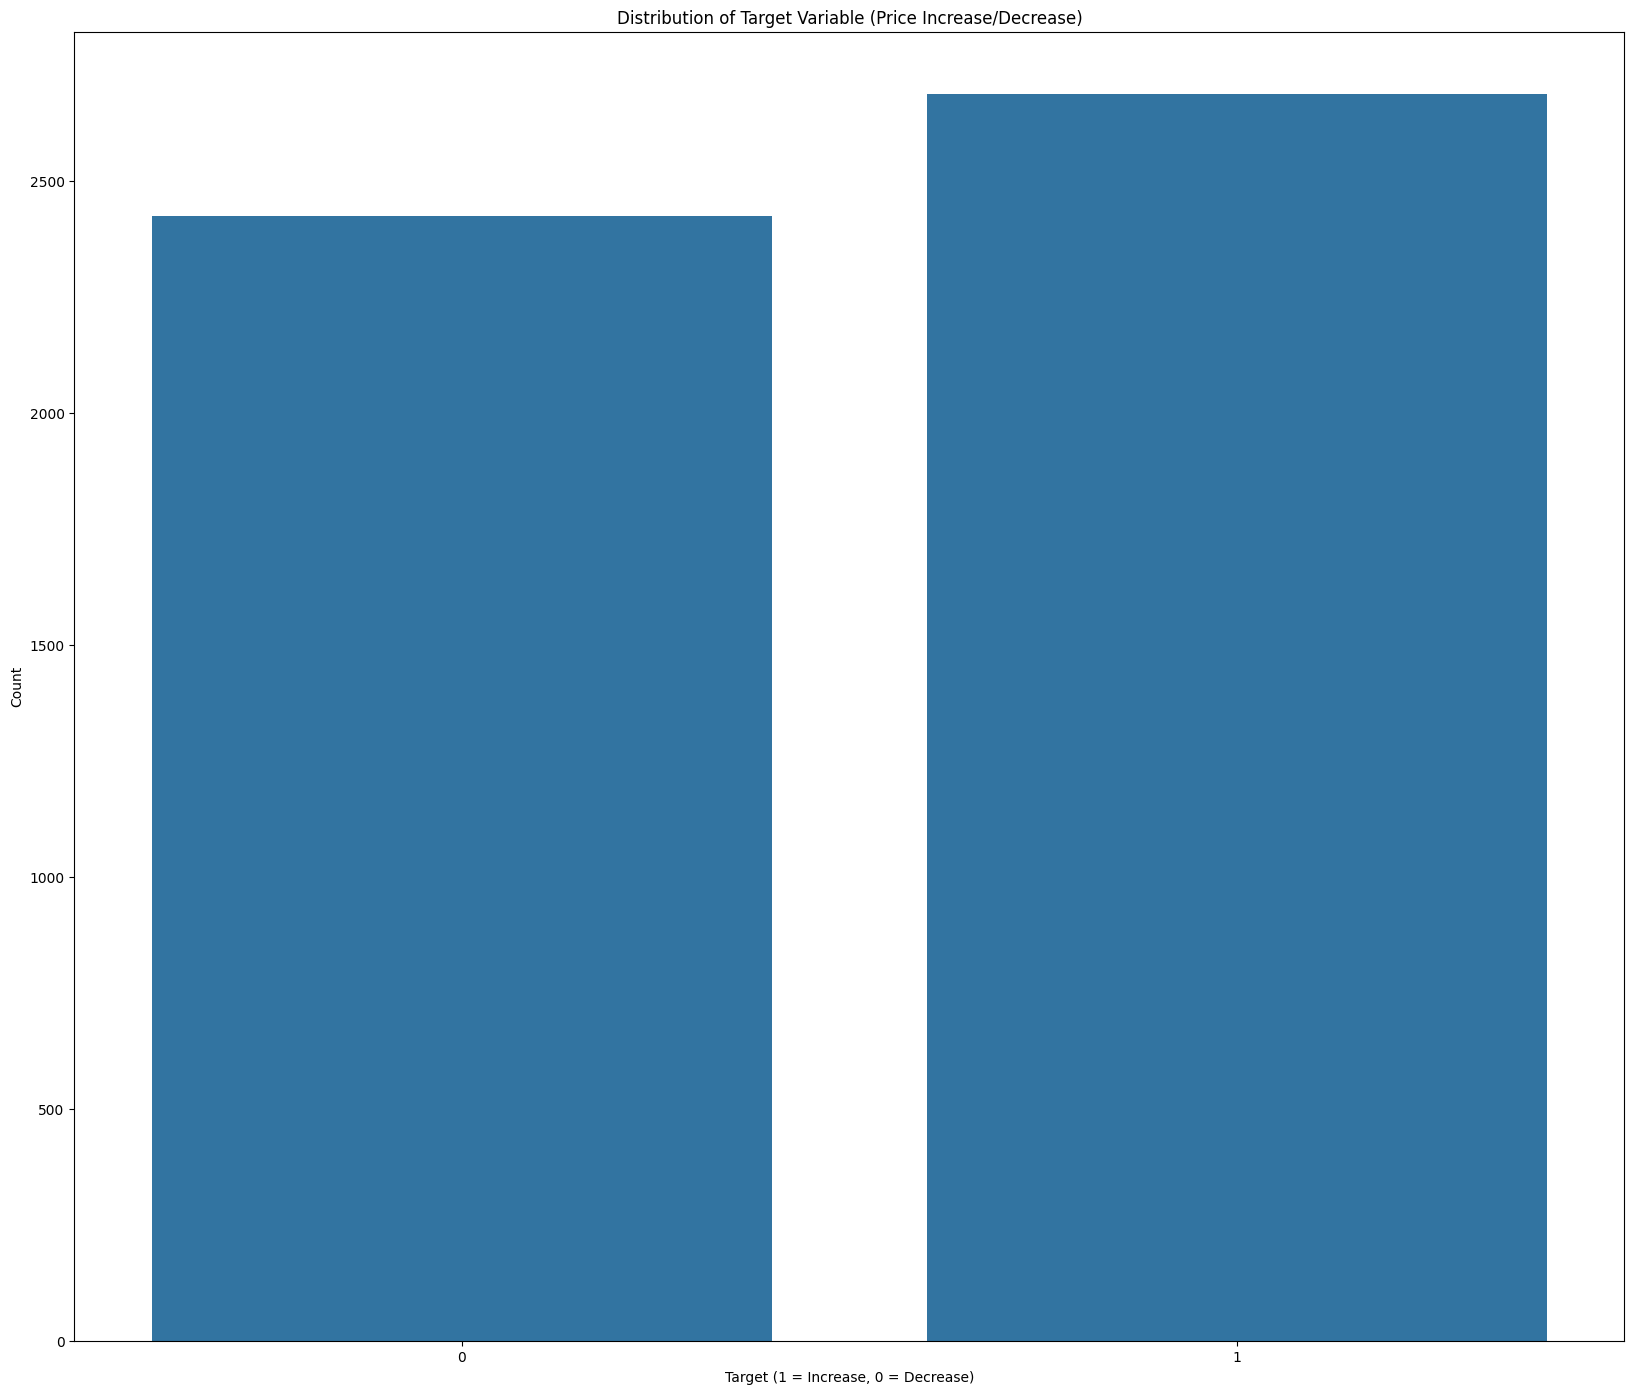

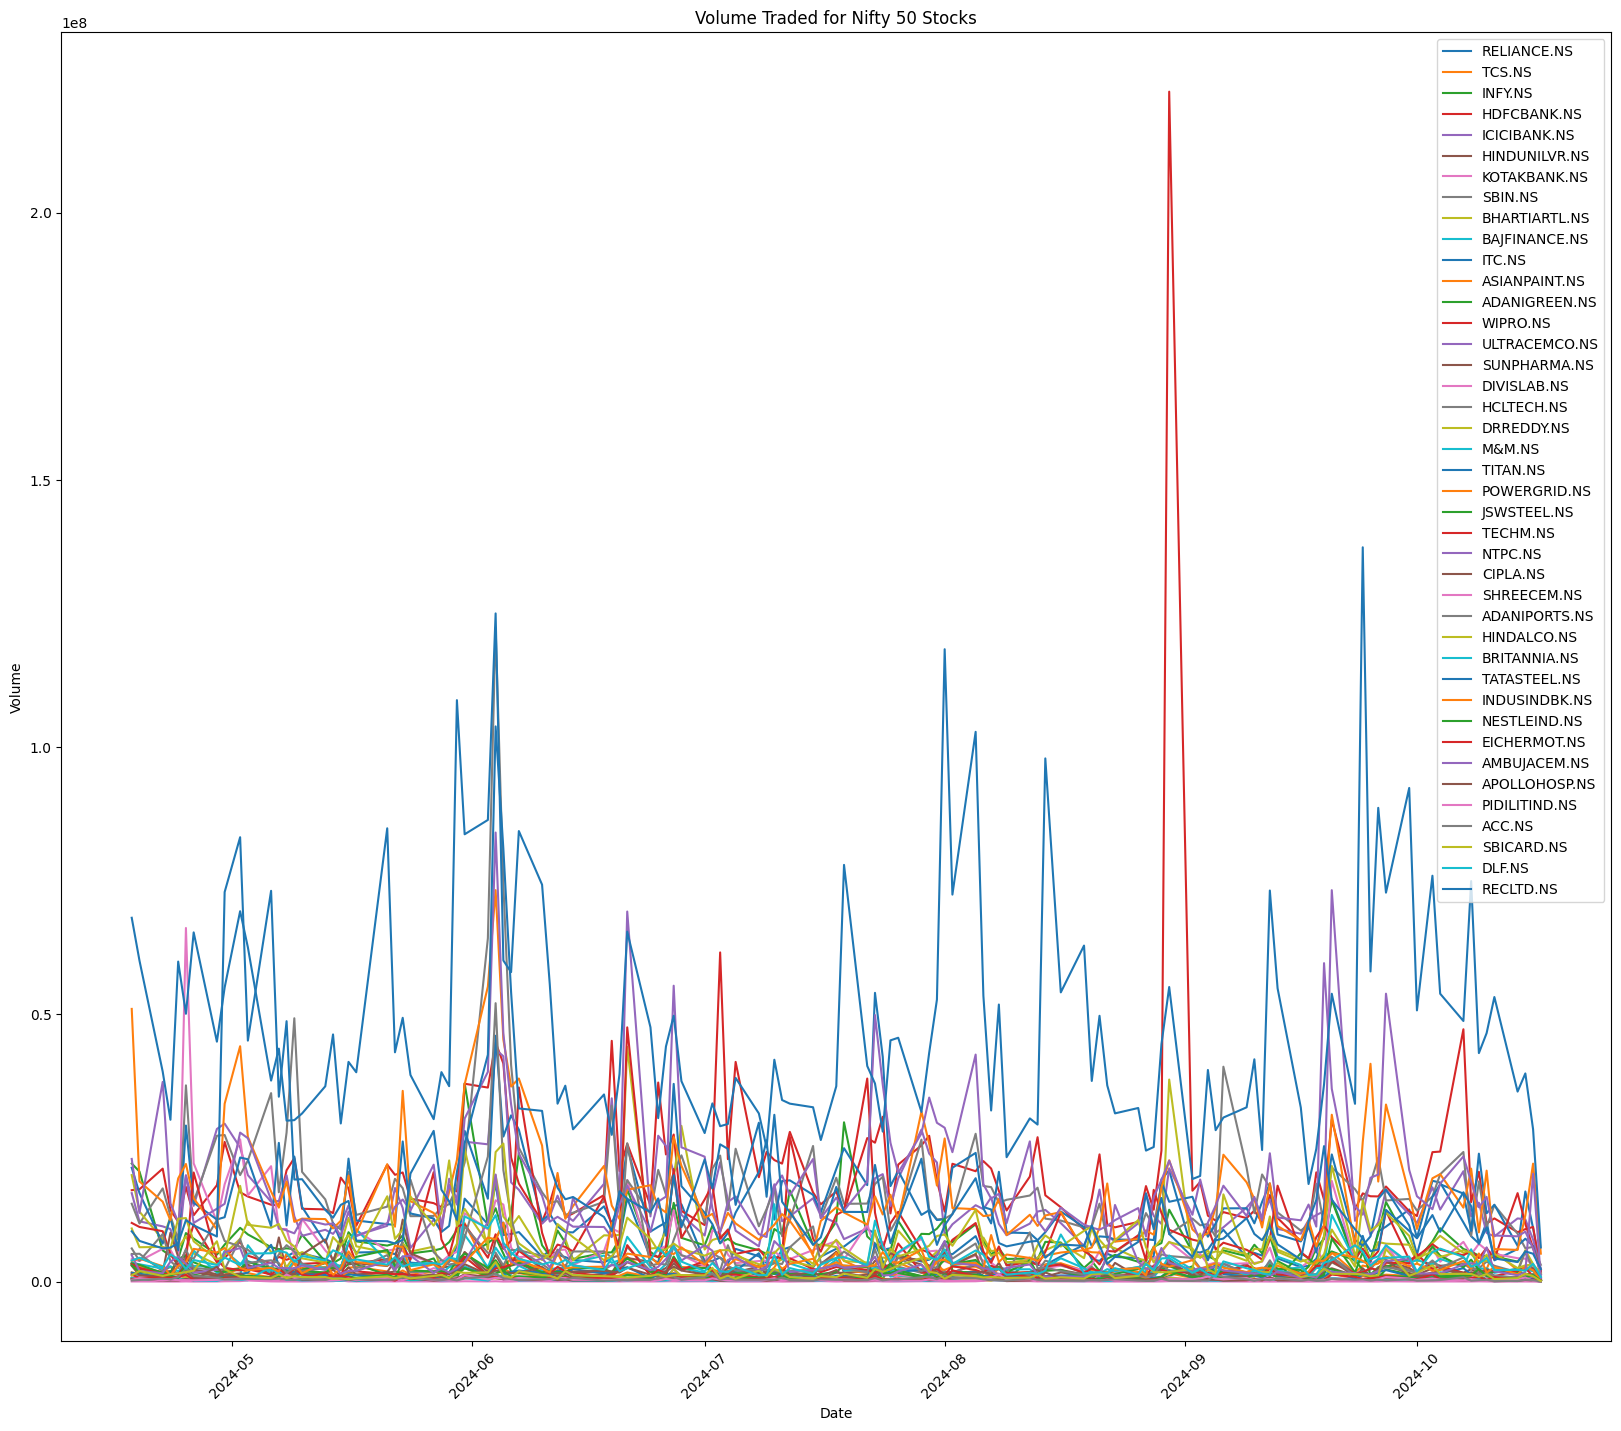

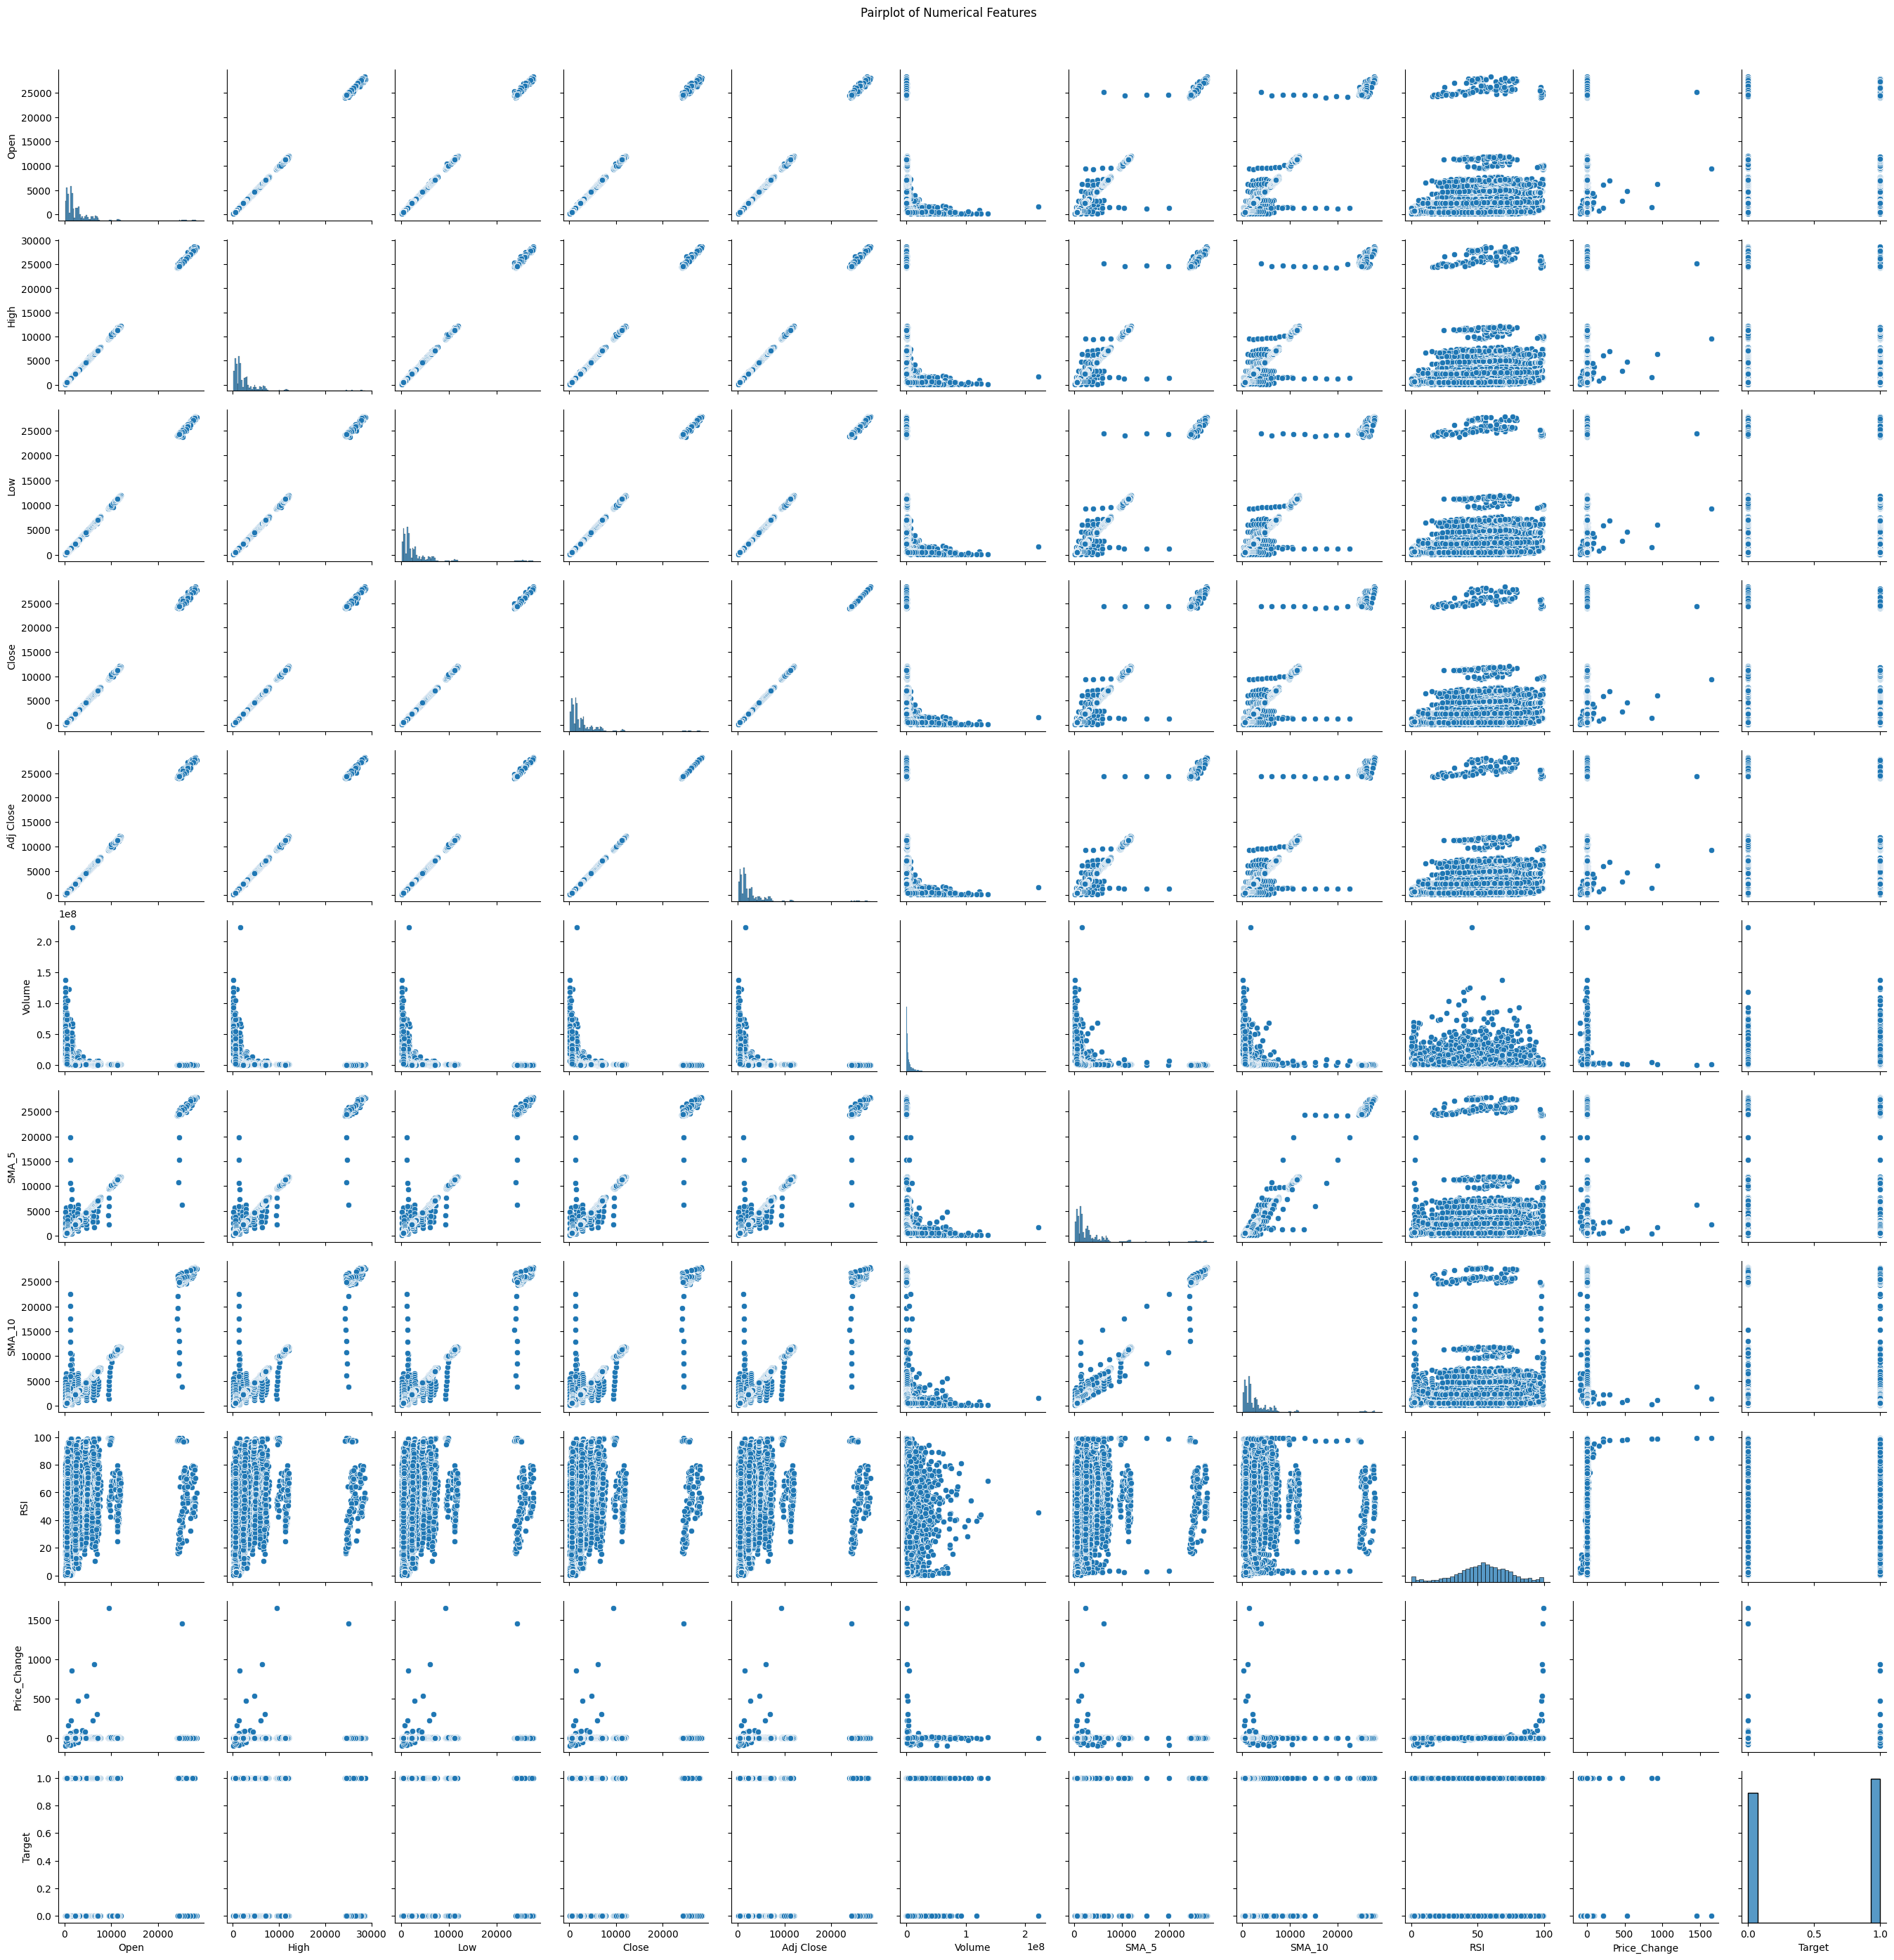

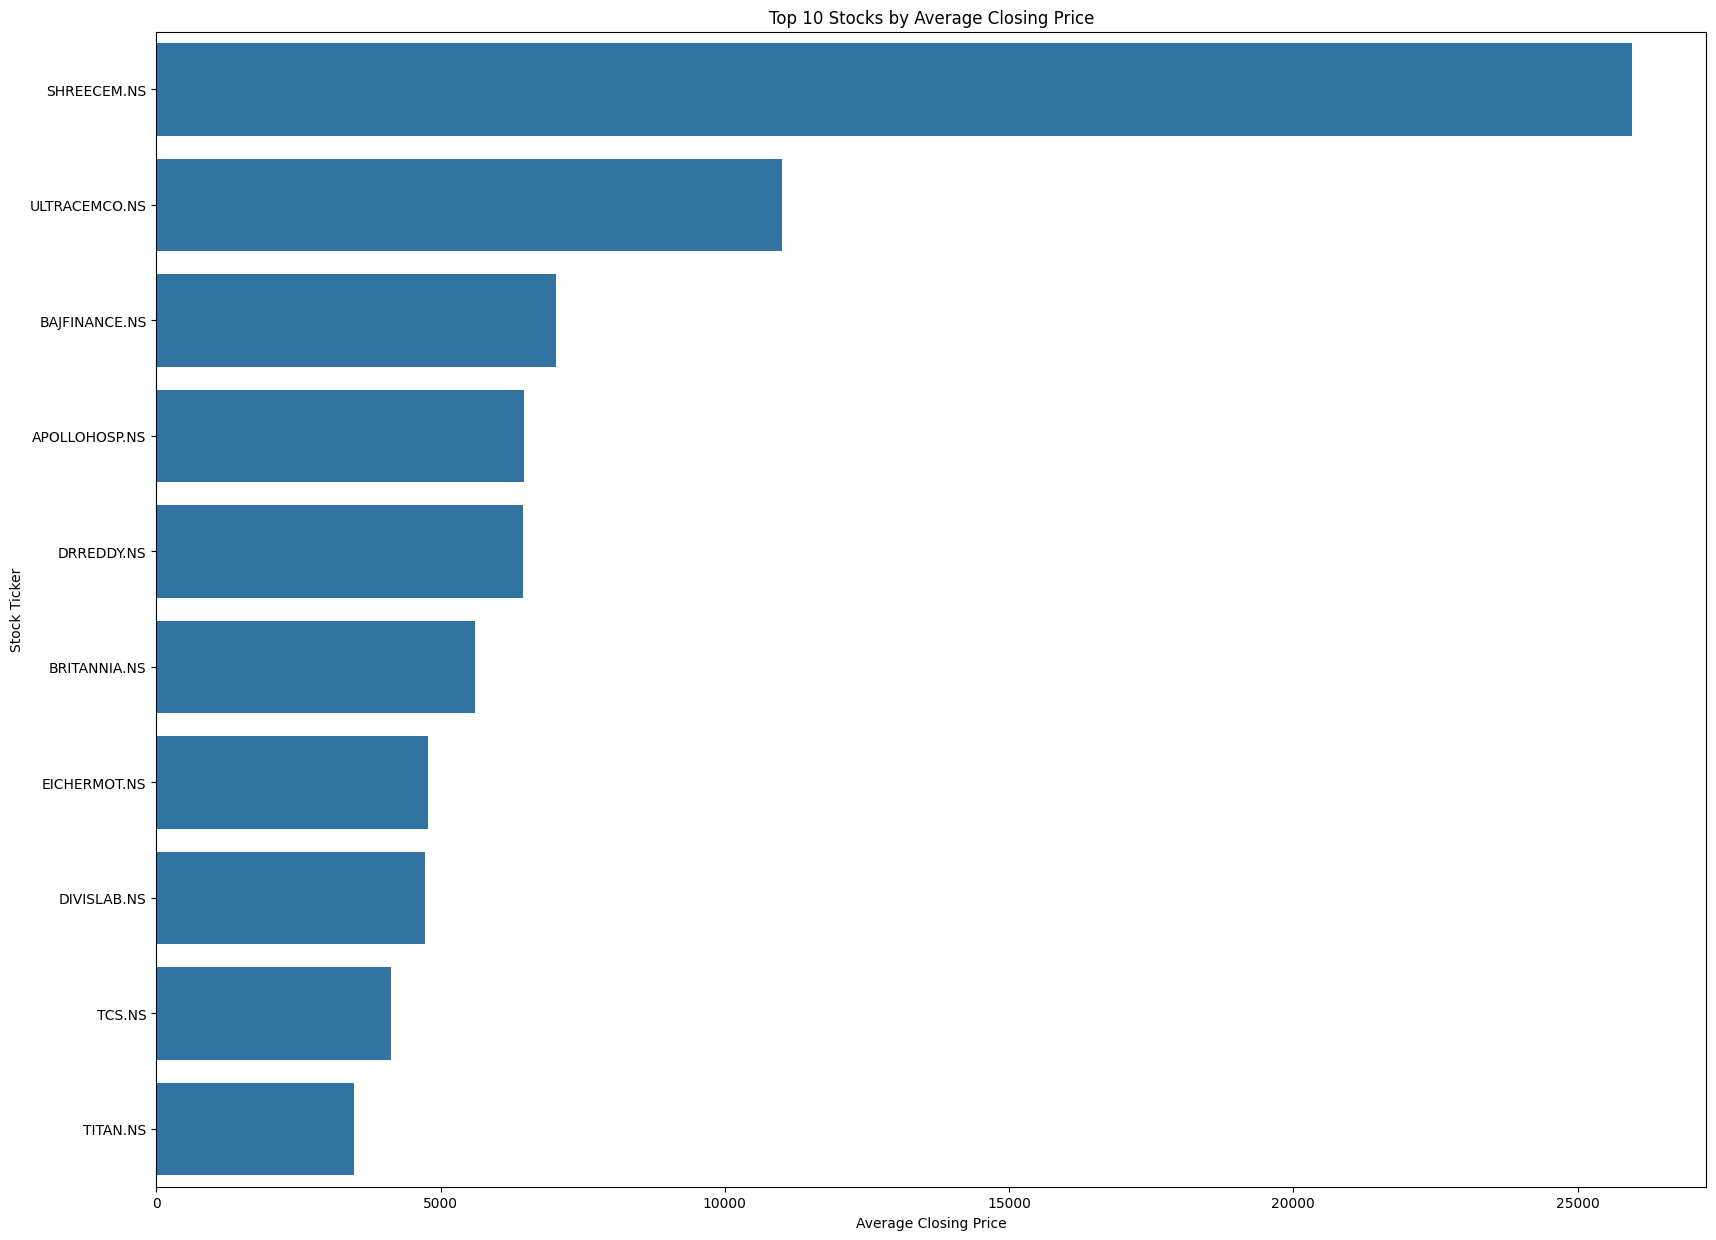

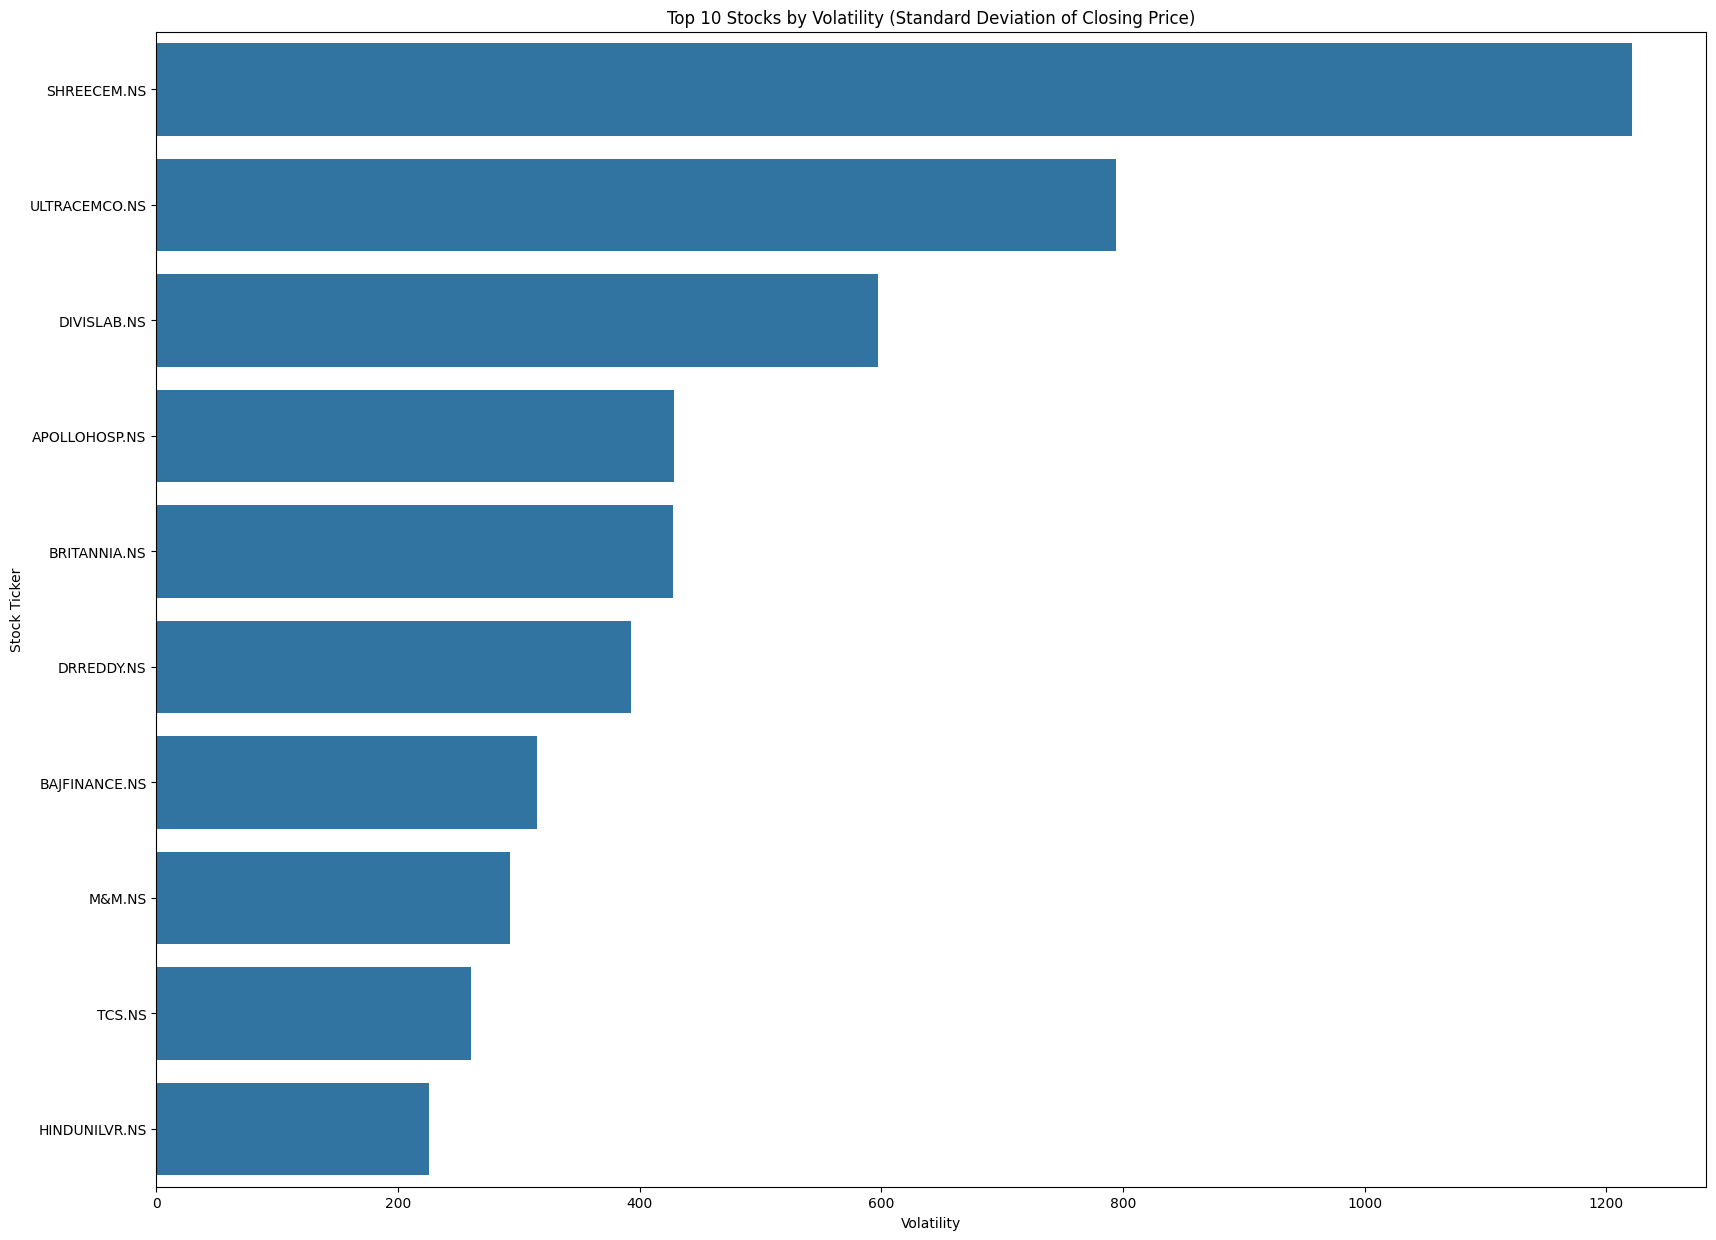

In [ ]:
all_stocks_data['Date'] = pd.to_datetime(all_stocks_data['Date'])
print(all_stocks_data.head(20))
print(all_stocks_data.describe())
plt.figure(figsize=(20, 17))
for ticker in all_stocks_data['Ticker'].unique():
    stock_data = all_stocks_data[all_stocks_data['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Close'], label=ticker)
plt.title('Closing Prices of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


numeric_columns = all_stocks_data.select_dtypes(include=[np.number]).columns
correlation = all_stocks_data[numeric_columns].corr()
plt.figure(figsize=(20, 17))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Nifty 50 Stocks')
plt.show()

plt.figure(figsize=(20, 17))
sns.boxplot(x='Ticker', y='Close', data=all_stocks_data)
plt.title('Boxplot of Closing Prices for Nifty 50 Stocks')
plt.xticks(rotation=90)
plt.show()


plt.figure(figsize=(20, 17))
sns.histplot(all_stocks_data['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices for Nifty 50 Stocks')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


plt.figure(figsize=(20, 17))
for ticker in all_stocks_data['Ticker'].unique():
    stock_data = all_stocks_data[all_stocks_data['Ticker'] == ticker]
    stock_data['Price_Change'] = stock_data['Close'].pct_change() * 100
    plt.plot(stock_data['Date'], stock_data['Price_Change'], label=ticker)
plt.title('Price Change Percentage of Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Price Change (%)')
plt.xticks(rotation=45)
plt.legend()
plt.show()


plt.figure(figsize=(20, 17))
for ticker in all_stocks_data['Ticker'].unique():
    stock_data = all_stocks_data[all_stocks_data['Ticker'] == ticker]
    plt.scatter(stock_data['Volume'], stock_data['Close'], label=ticker, alpha=0.5)
plt.title('Closing Price vs Volume Traded for Nifty 50 Stocks')
plt.xlabel('Volume Traded')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


plt.figure(figsize=(20, 17))
sns.countplot(x='Target', data=all_stocks_data)
plt.title('Distribution of Target Variable (Price Increase/Decrease)')
plt.xlabel('Target (1 = Increase, 0 = Decrease)')
plt.ylabel('Count')
plt.show()


plt.figure(figsize=(20, 17))
for ticker in all_stocks_data['Ticker'].unique():
    stock_data = all_stocks_data[all_stocks_data['Ticker'] == ticker]
    plt.plot(stock_data['Date'], stock_data['Volume'], label=ticker)
plt.title('Volume Traded for Nifty 50 Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.legend()
plt.show()


sns.pairplot(all_stocks_data[numeric_columns])
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()


avg_close = all_stocks_data.groupby('Ticker')['Close'].mean().reset_index()
avg_close = avg_close.sort_values(by='Close', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Close', y='Ticker', data=avg_close.head(10))
plt.title('Top 10 Stocks by Average Closing Price')
plt.xlabel('Average Closing Price')
plt.ylabel('Stock Ticker')
plt.show()


volatility = all_stocks_data.groupby('Ticker')['Close'].std().reset_index()
volatility = volatility.sort_values(by='Close', ascending=False)

plt.figure(figsize=(20, 15))
sns.barplot(x='Close', y='Ticker', data=volatility.head(10))
plt.title('Top 10 Stocks by Volatility (Standard Deviation of Closing Price)')
plt.xlabel('Volatility')
plt.ylabel('Stock Ticker')
plt.show()



In [ ]:
features = ['Close', 'SMA_5', 'SMA_10', 'RSI']
X = all_stocks_data[features]
y = all_stocks_data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
pip install xgboost


In [ ]:
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:34:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy = model.score(X_test, y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 0.51


In [ ]:

predictions = {}
predicted_pct_changes = {}

for ticker in nifty_50_stocks:
    ticker_data = all_stocks_data[all_stocks_data['Ticker'] == ticker].tail(1)  # Get the last row for the stock
    if not ticker_data.empty:  # Ensure there is data for the ticker
        X_real_time = ticker_data[features].values
        X_scaled = scaler.transform(X_real_time)
        prediction = model.predict(X_scaled)


        predictions[ticker] = prediction[0]


        last_close_price = ticker_data['Close'].values[0]
        predicted_pct_change = (model.predict_proba(X_scaled)[0][1] - 0.5)
        predicted_pct_changes[ticker] = predicted_pct_change
max_increase_stock = max(predicted_pct_changes, key=predicted_pct_changes.get)
max_decrease_stock = min(predicted_pct_changes, key=predicted_pct_changes.get)


for ticker, prediction in predictions.items():
    pct_change = predicted_pct_changes[ticker]
    movement = 'Increase' if prediction == 1 else 'Decrease'
    print(f"Predicted price movement for {ticker} for next day: {movement}")
    print(f"Predicted percentage change: {pct_change:.2f}%")


print(f"\nStock with maximum predicted increase: {max_increase_stock} ({predicted_pct_changes[max_increase_stock]:.2f}%)")
print(f"Stock with maximum predicted decrease: {max_decrease_stock} ({predicted_pct_changes[max_decrease_stock]:.2f}%)")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

Predicted price movement for RELIANCE.NS for next day: Increase
Predicted percentage change: 28.16%
Predicted price movement for TCS.NS for next day: Decrease
Predicted percentage change: -24.88%
Predicted price movement for INFY.NS for next day: Increase
Predicted percentage change: 1.89%
Predicted price movement for HDFCBANK.NS for next day: Increase
Predicted percentage change: 21.80%
Predicted price movement for ICICIBANK.NS for next day: Increase
Predicted percentage change: 40.29%
Predicted price movement for HINDUNILVR.NS for next day: Decrease
Predicted percentage change: -43.83%
Predicted price movement for KOTAKBANK.NS for next day: Decrease
Predicted percentage change: -2.82%
Predicted price movement for SBIN.NS for next day: Increase
Predicted percentage change: 53.84%
Predicted price movement for BHARTIARTL.NS for next day: Increase
Predicted percentage change: 48.41%
Predicted price movement for BAJFINANCE.NS for next day: Decrease
Predicted percentage change: -41.28%
Pre

<ipython-input-14-65234db6ebad>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Increase', 'Decrease'], y=[increase_count, decrease_count], palette='viridis')


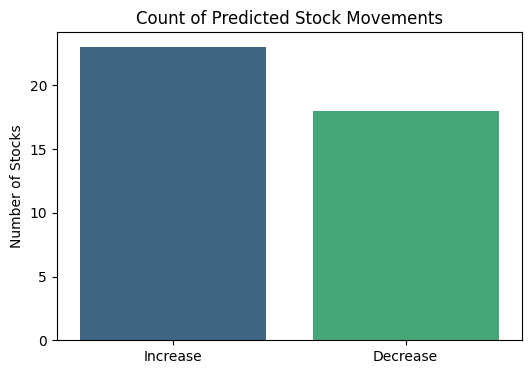

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
increase_count = sum(1 for p in predictions.values() if p == 1)
decrease_count = sum(1 for p in predictions.values() if p == 0)
plt.figure(figsize=(6, 4))
sns.barplot(x=['Increase', 'Decrease'], y=[increase_count, decrease_count], palette='viridis')
plt.title('Count of Predicted Stock Movements')
plt.ylabel('Number of Stocks')
plt.show()


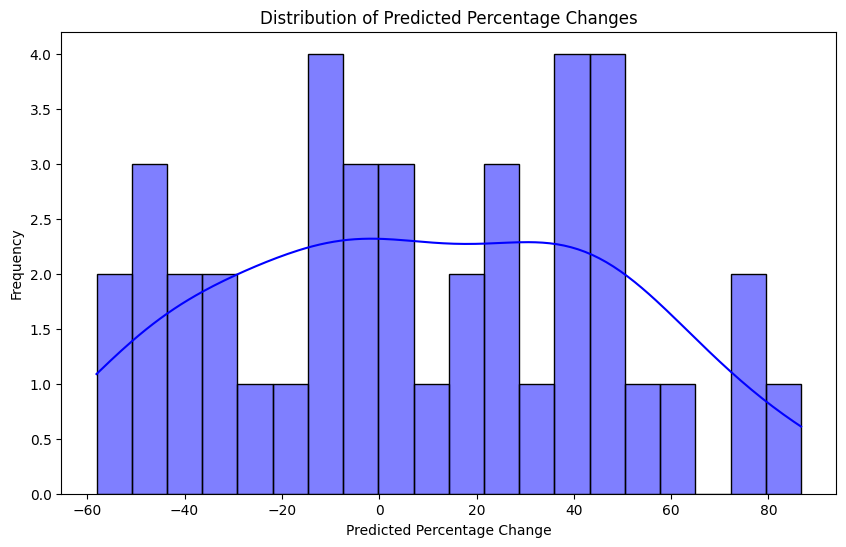

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(list(predicted_pct_changes.values()), kde=True, bins=20, color='blue')
plt.title('Distribution of Predicted Percentage Changes')
plt.xlabel('Predicted Percentage Change')
plt.ylabel('Frequency')
plt.show()


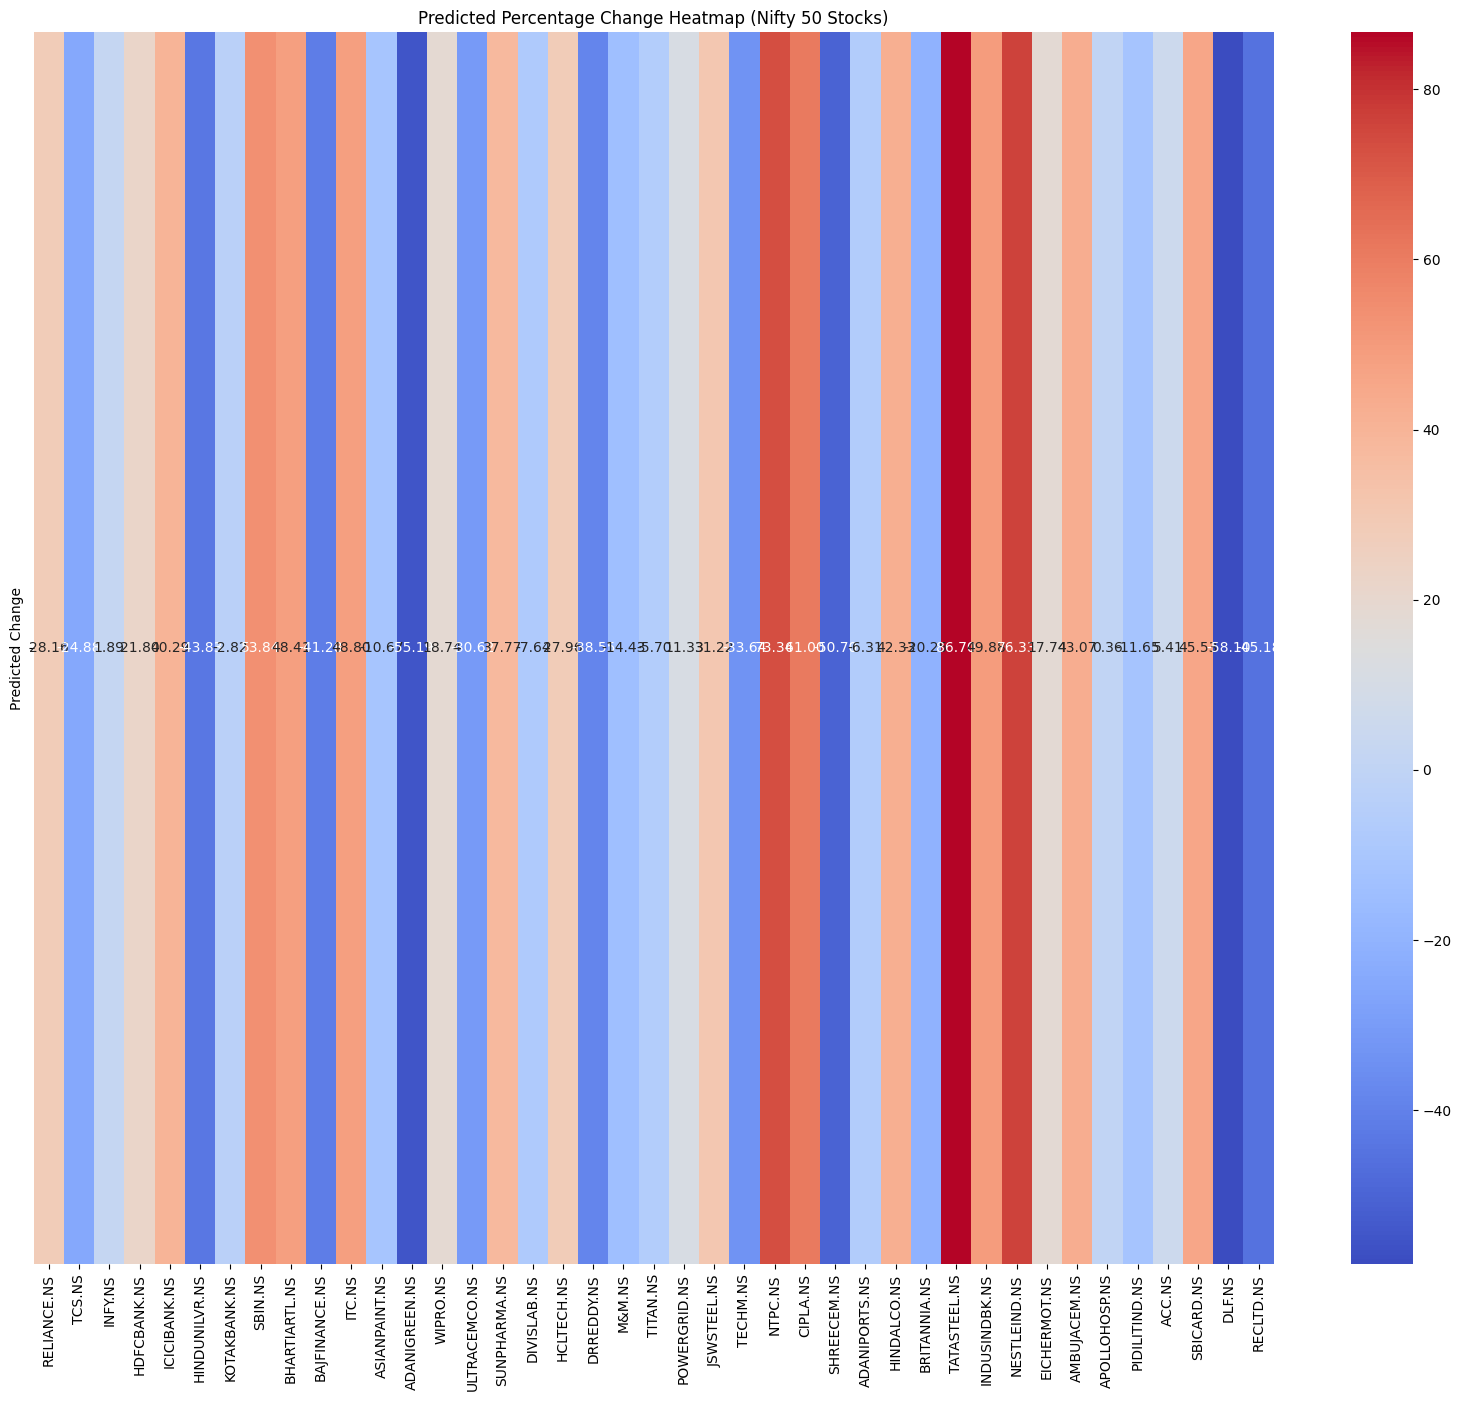

In [ ]:
plt.figure(figsize=(20, 16))
pct_change_df = pd.DataFrame.from_dict(predicted_pct_changes, orient='index', columns=['Predicted Change'])
sns.heatmap(pct_change_df.T, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Predicted Percentage Change Heatmap (Nifty 50 Stocks)')
plt.show()


<ipython-input-19-f0b6cf0aab75>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[stock for stock, _ in top_5_increase], y=[pct for _, pct in top_5_increase], palette='Greens')


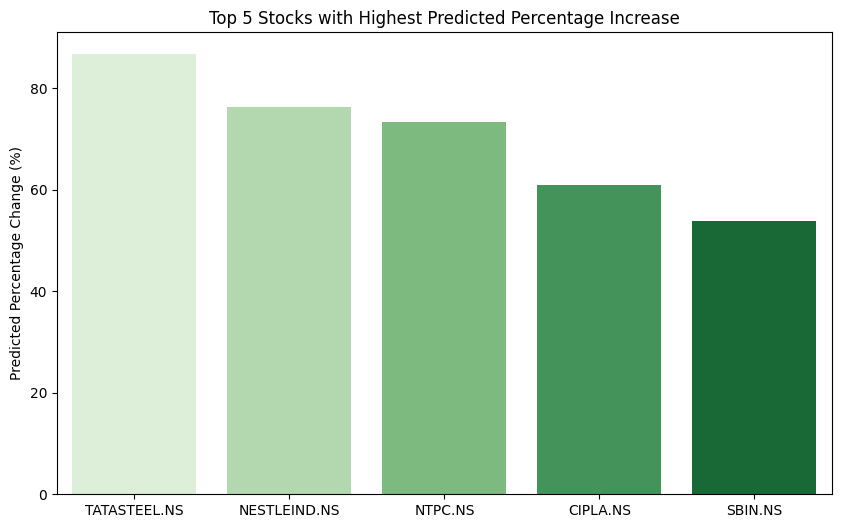

<ipython-input-19-f0b6cf0aab75>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[stock for stock, _ in top_5_decrease], y=[pct for _, pct in top_5_decrease], palette='Reds')


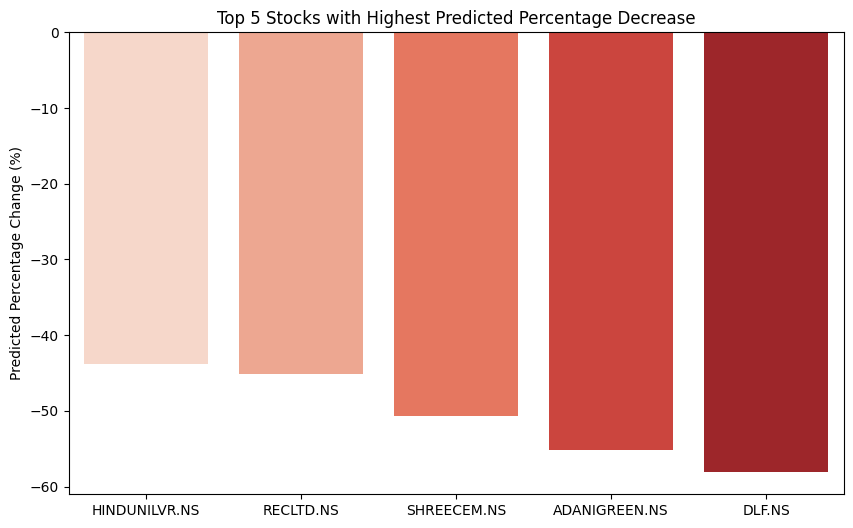

In [ ]:
sorted_changes = sorted(predicted_pct_changes.items(), key=lambda x: x[1], reverse=True)
top_5_increase = sorted_changes[:5]
top_5_decrease = sorted_changes[-5:]
plt.figure(figsize=(10, 6))
sns.barplot(x=[stock for stock, _ in top_5_increase], y=[pct for _, pct in top_5_increase], palette='Greens')
plt.title('Top 5 Stocks with Highest Predicted Percentage Increase')
plt.ylabel('Predicted Percentage Change (%)')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=[stock for stock, _ in top_5_decrease], y=[pct for _, pct in top_5_decrease], palette='Reds')
plt.title('Top 5 Stocks with Highest Predicted Percentage Decrease')
plt.ylabel('Predicted Percentage Change (%)')
plt.show()


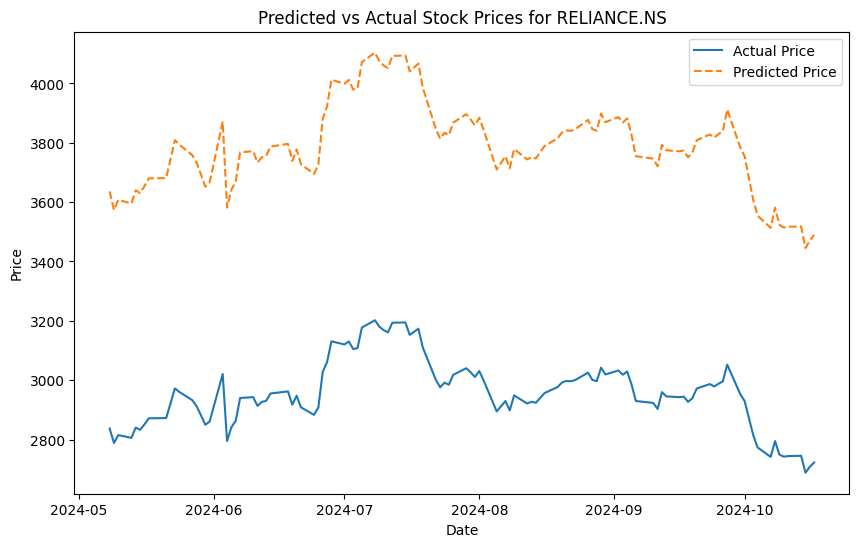

In [ ]:
plt.figure(figsize=(10, 6))
stock = 'RELIANCE.NS'
stock_data = all_stocks_data[all_stocks_data['Ticker'] == stock]
plt.plot(stock_data['Date'], stock_data['Close'], label='Actual Price')
predicted_prices = stock_data['Close'] * (1 + (predicted_pct_changes[stock] / 100))  # Estimate predicted price
plt.plot(stock_data['Date'], predicted_prices, label='Predicted Price', linestyle='--')
plt.title(f'Predicted vs Actual Stock Prices for {stock}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
